Sandro Adijaya - A11.2020.12404

#1) Pengumpulan Data

Dataset yang akan digunakan untuk project kali ini adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" dimana  sebelum memakai dataset tersebut anda dapat membaca
deskripsi dataset yang ada pada file "heart-disease.names"

#2) Menelaah Data


pilih dan masukan library untuk menelaah data

In [101]:
import pandas as pd
import numpy as np
import re
import itertools
from google.colab import drive


#Load Data

Masukkan dataset yang diperlukan dengan menentukan lokasi penyimpanan yang sesuai, lalu simpan data tersebut ke dalam suatu variabel.

In [102]:
dir = 'hungarian.data'

lalu buat iterasi untuk membaca dataset

In [103]:
with open(dir, encoding='Latin1') as file :
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Setelah membaca file dataset, lakukan iterasi berdasarkan jumlah kolom dan baris yang terdapat dalam dataset. Informasi mengenai kolom dan baris dapat ditemukan dalam deskripsi dataset yang telah dijelaskan sebelumnya.

In [104]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Menampilkan informasi dari file dataset yang telah dimasukkan ke dalam dataframe.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dalam situasi dataset yang kita miliki, terdapat kondisi khusus di mana sebelum memulai proses validasi data untuk tipe data objek atau string, perlu dilakukan penghapusan fitur. Hal ini disebabkan oleh fakta bahwa dalam dataset ini, nilai null diindikasikan dengan angka -9.0.

In [106]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [107]:
df = df.astype(float)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

#3) Validasi Data

# Pada langkah ini, tujuannya adalah untuk memahami isi dataset sehingga dapat mengambil tindakan yang sesuai dengan kondisi data. Salah satu tindakan yang diambil adalah mengubah nilai -9.0 menjadi nilai null sesuai dengan deskripsi dataset.

In [109]:
df.replace(-9.0, np.nan, inplace= True)

menghitung jumlah nilai null value.

In [110]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [111]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

#4) Menentukan Object Data

Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [113]:
df_selected = df.iloc[:,[1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [114]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [115]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [116]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}
df_selected.rename(columns=column_mapping, inplace =True)

<ipython-input-116-1f6400c006df>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace =True)


In [117]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur yang ada pada dataset

In [118]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

#5) Membersihkan Data

Sebelum memulai proses pemodelan, dilakukan pembersihan data untuk memastikan model yang dihasilkan lebih akurat. Salah satu langkah dalam pembersihan ini adalah menghitung jumlah nilai null yang terdapat dalam dataset.

In [119]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Dari hasil keluaran kode program di atas, terdapat beberapa fitur yang hampir 90% datanya merupakan nilai null. Oleh karena itu, perlu dilakukan penghapusan fitur tersebut menggunakan fungsi drop.

In [120]:
columns_to_drop = ['slope', 'ca', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

Karena masih terdapat nilai null pada beberapa kolom fitur, langkah selanjutnya adalah mengisi nilai null tersebut dengan menggunakan nilai rata-rata (mean) di setiap kolomnya.

In [121]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [122]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

In [123]:
meanTBPS = round(meanTBPS.mean())
meanChol =  round(meanChol.mean())
meanfbs =  round(meanfbs.mean())
meanRestCG =  round(meanRestCG.mean())
meanthalach =  round(meanthalach.mean())
meanexang =  round(meanexang.mean())

Mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya.

In [124]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [125]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [126]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Melalukan pengecekan apakah ada duplikaksi data.

In [127]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat.

In [128]:
dfClean = dfClean.drop_duplicates()
print('All Duplicate Row: ')
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Row: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [129]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

meng-import library yang digunakan untuk data vizualitation dan mencari korelasi antar data

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt


Mencari korelasi antar fitur.

In [131]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

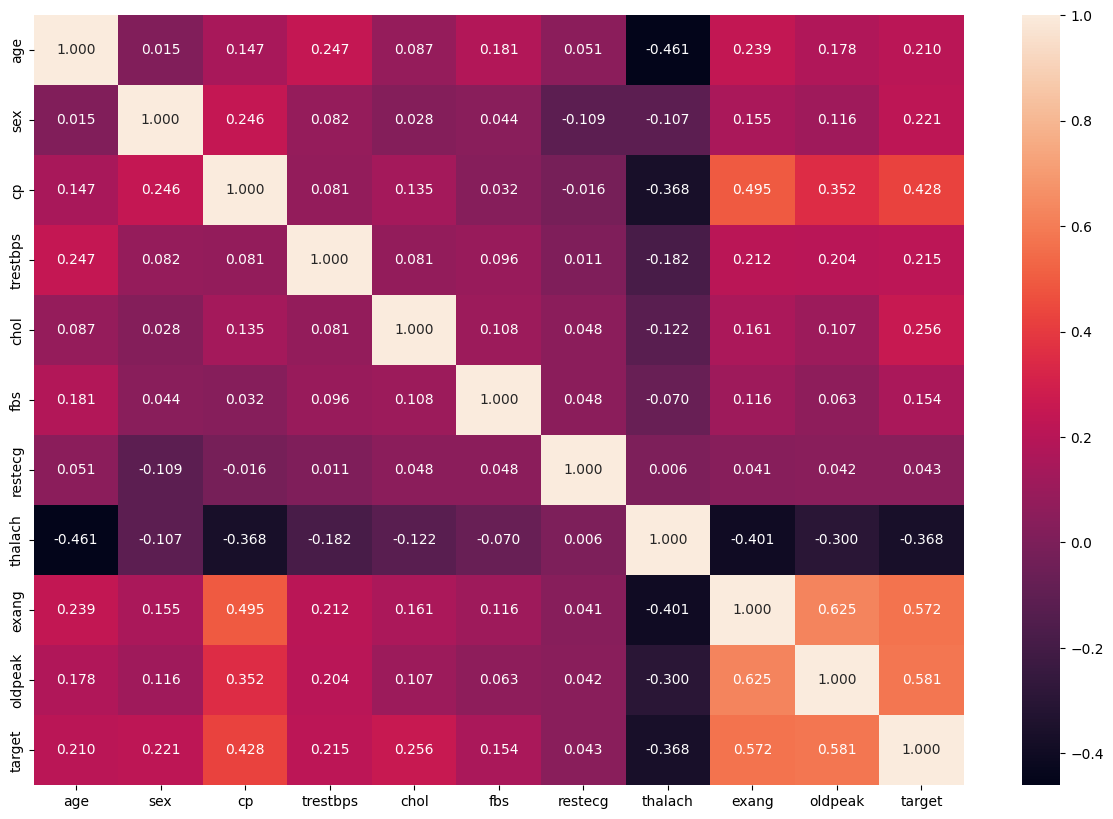

In [132]:
cor_mat = dfClean.corr()
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0, fmt='.3f')

#6) Konstruksi Data

Dalam tahap ini, konstruksi data memiliki salah satu tujuan, yaitu untuk menyesuaikan semua tipe data yang terdapat dalam dataset. Namun, pada tahap ini, dataset telah memiliki tipe data yang sesuai sehingga tidak diperlukan penyesuaian lebih lanjut.

In [133]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [134]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe data pada dataset, langkah selanjutnya adalah memisahkan antara fitur (features) dan target, kemudian menyimpannya dalam variabel terpisah.

In [135]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Setelah memisahkan antara fitur dan target, disarankan untuk melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target.

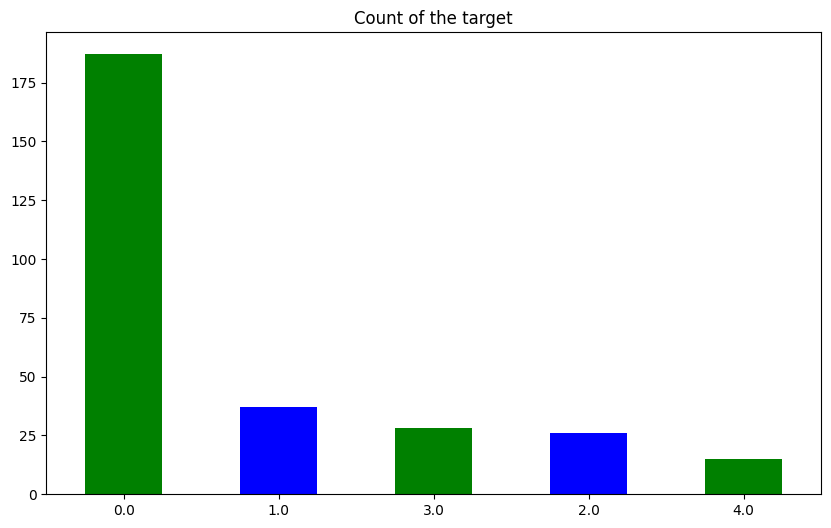

In [136]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);


Pada grafik di atas, terlihat bahwa persebaran jumlah target tidak seimbang. Oleh karena itu, perlu dilakukan penyeimbangan terlebih dahulu. Terdapat dua cara umum untuk menyeimbangkan dataset, yaitu oversampling dan undersampling. Oversampling biasanya dilakukan jika jumlah dataset terlalu sedikit, sementara undersampling dilakukan jika jumlah data terlalu banyak.

Dalam konteks ini, kita akan melakukan oversampling karena jumlah data kita terbatas. Salah satu metode oversampling yang dapat digunakan adalah SMOTE (Synthetic Minority Over-sampling Technique).

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)


In [139]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [140]:
new_df1 = pd.DataFrame(data=y)

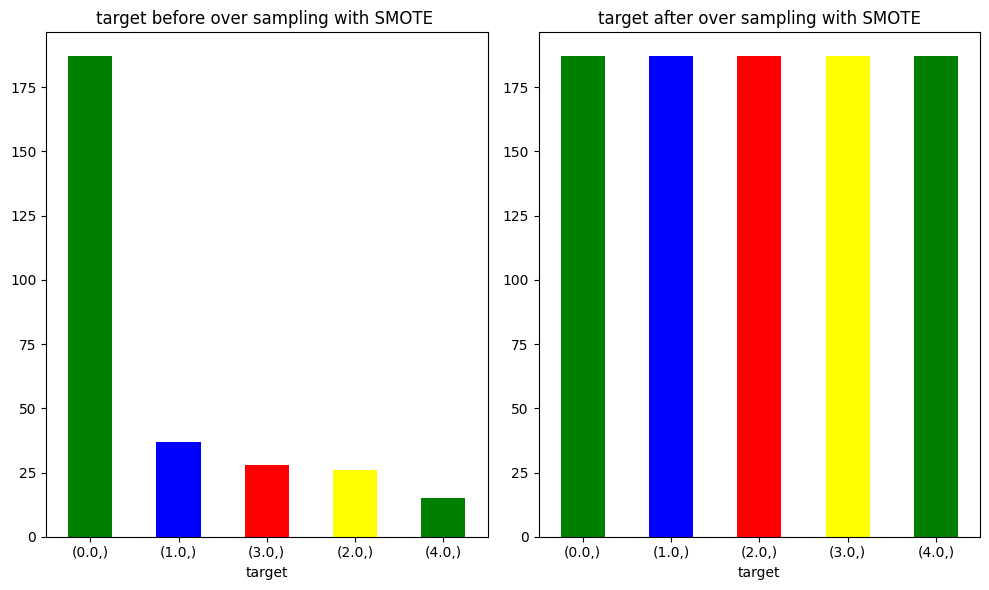

In [141]:
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()


Grafik di atas memperlihatkan perbedaan antara kondisi ketika target belum seimbang dan setelah seimbang melalui penggunaan metode oversampling.

In [142]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [143]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()


target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah meratakan distribusi jumlah target, langkah selanjutnya adalah memeriksa apakah perlu melakukan normalisasi atau standarisasi pada dataset kita.

In [144]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Dari penjelasan di atas, terlihat bahwa terdapat perbedaan yang cukup besar dalam rentang nilai dari standar deviasi setiap fitur dalam dataset kita. Oleh karena itu, disarankan untuk melakukan normalisasi atau standarisasi guna mengurangi perbedaan rentang standar deviasi di setiap kolom.

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)


len(X_smote_resampled_normal)


935

In [147]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah melakukan normalisasi pada fitur, langkah berikutnya adalah memisahkan fitur dan target menjadi data pelatihan (train) dan uji (test).

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)


In [150]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)


#7) Model

Pada langkah ini, kami akan memulai proses pembangunan model.

Berikut adalah sebuah fungsi yang digunakan untuk menampilkan hasil akurasi dan nilai rata-rata dari recall, f1, serta precision score pada setiap model. Pembuatan fungsi ini bersifat opsional dan dapat dipanggil pada setiap model.

In [151]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [152]:
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3), 'recall': round(rcl,3),
  'F1 score': round(f1,3),
  'Precision score': round(ps,3)
  }

  return print(metric_dict)


#Oversampling
Oversampling merupakan suatu teknik yang diterapkan dalam machine learning untuk mengatasi ketidakseimbangan kelas dalam dataset. Ketidakseimbangan kelas terjadi ketika jumlah sampel untuk setiap kelas tidak seimbang, hal ini dapat memengaruhi performa model dalam memprediksi kelas minoritas. Dengan menerapkan oversampling, kita meningkatkan frekuensi sampel dari kelas minoritas sehingga proporsi antara kelas mayoritas dan kelas minoritas menjadi lebih seimbang.

#KNN
Dalam tahap ini, kami akan memulai proses pembangunan model menggunakan algoritma KNN (K-Nearest Neighbors) dengan menetapkan jumlah tetangga (neighbors) sebanyak 3.


In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [154]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Di bawah ini adalah potongan kode program yang digunakan untuk menampilkan tingkat akurasi menggunakan algoritma KNN.

In [155]:
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [156]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Dalam visualisasi ini, ditampilkan confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

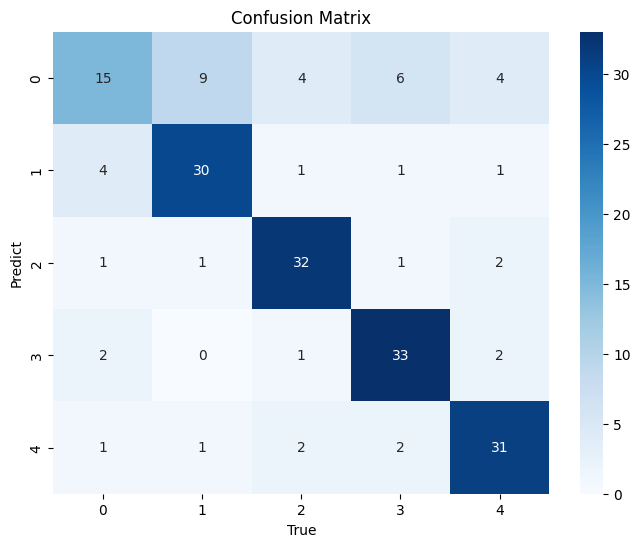

In [157]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#Random Forest

Berikutnya, kita akan melakukan pembangunan model menggunakan algoritma random forest dengan n_estimators sebanyak 100. N_estimators memiliki peran untuk mengatur jumlah pohon keputusan yang akan dibangun.

In [158]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [159]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [160]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


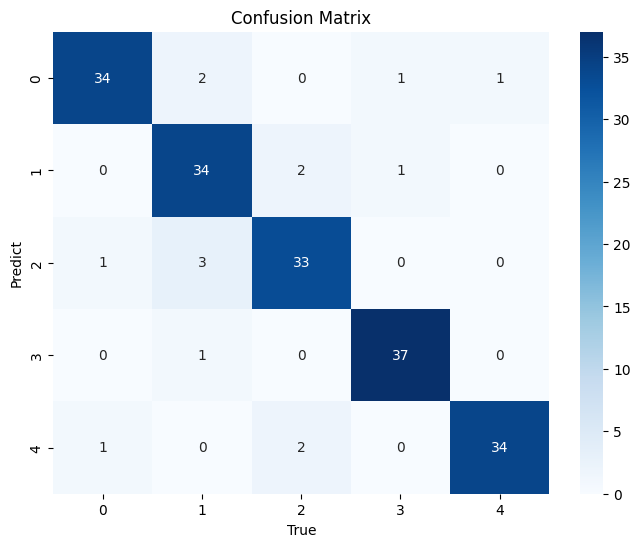

In [161]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#XGBoost


Dalam langkah ini pada proses pembangunan model, kita akan memanfaatkan algoritma XGBoost dengan learning rate sebesar 0.1. Learning rate berfungsi untuk mengontrol sejauh mana kita melakukan penyesuaian pada bobot model.

In [162]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [163]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [164]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


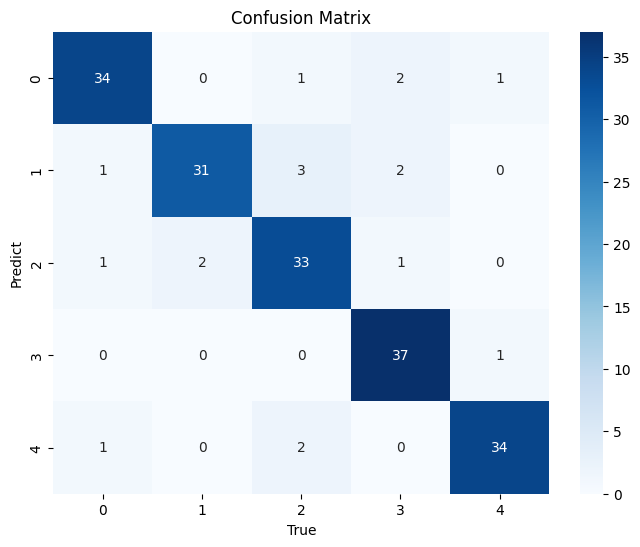

In [165]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#Oversample + Normalisasi
Dalam segmen ini, kita akan mengembangkan model menggunakan dataset yang telah mengalami proses oversampling dan normalisasi. Algoritma yang digunakan tetap sama seperti sebelumnya, yaitu KNN, Random Forest, dan XGBoost. Selanjutnya, kita akan membuat visualisasi hasil evaluasi pada masing-masing model.

#KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [167]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [168]:
# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test_normal)
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [169]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


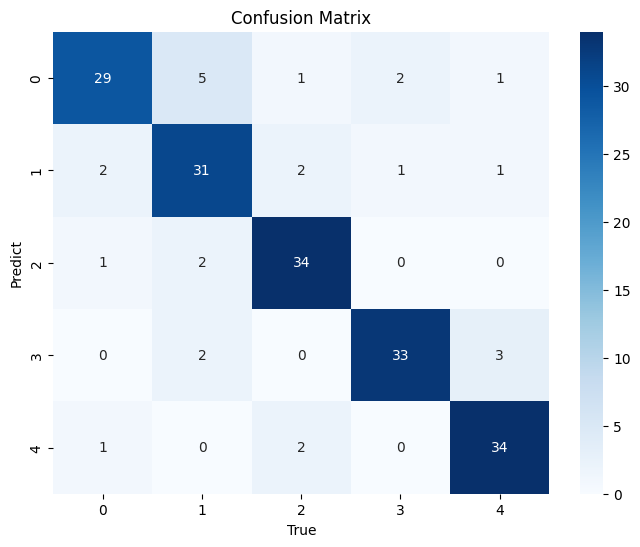

In [170]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#Random Forest

In [171]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [172]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [173]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


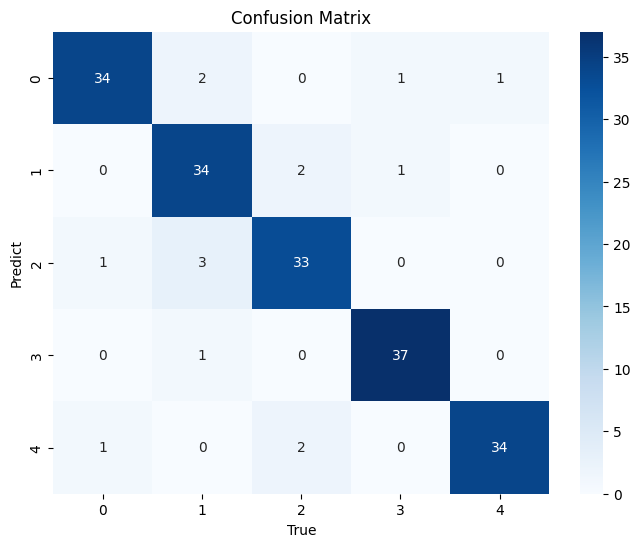

In [174]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#XGBoost

In [175]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [176]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



#Tuning + Normalizaton + Oversampling

Dalam proses pembuatan model ini, kita tetap menggunakan algoritma yang sama, yaitu KNN, Random Forest, dan XGBoost. Namun, data yang digunakan telah mengalami proses penyetelan parameter (Tuning Parameter), normalisasi, dan oversampling.

#KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


Parameter tuning tidak konsisten di setiap kasus karena bergantung pada jenis algoritma yang sedang digunakan.

In [178]:
knn_model = KNeighborsClassifier()
param_grid = {
  "n_neighbors": range(3, 21),
  "metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
  "algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}


In [179]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [180]:
knn_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [181]:
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'kd_tree'}


In [182]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [183]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


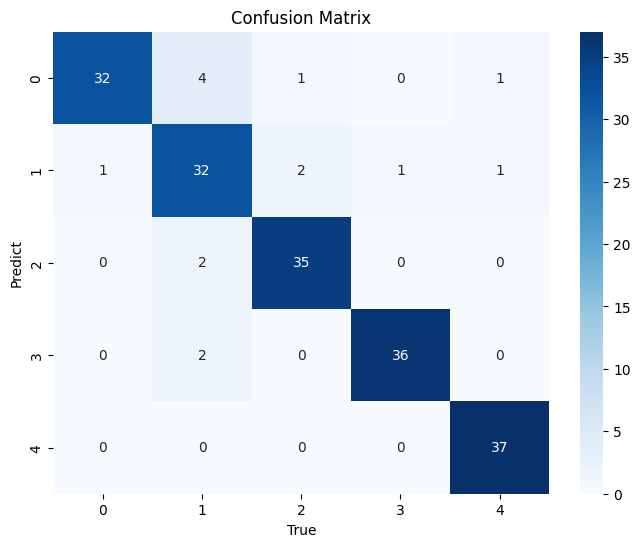

In [184]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#Random Forest

In [185]:
rf_model = RandomForestClassifier()

param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}


In [186]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [187]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.84      0.86      0.85        37
         2.0       0.80      0.86      0.83        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.86      0.91        37

    accuracy                           0.89       187
   macro avg       0.90      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [188]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.894, 'Precision score': 0.897}


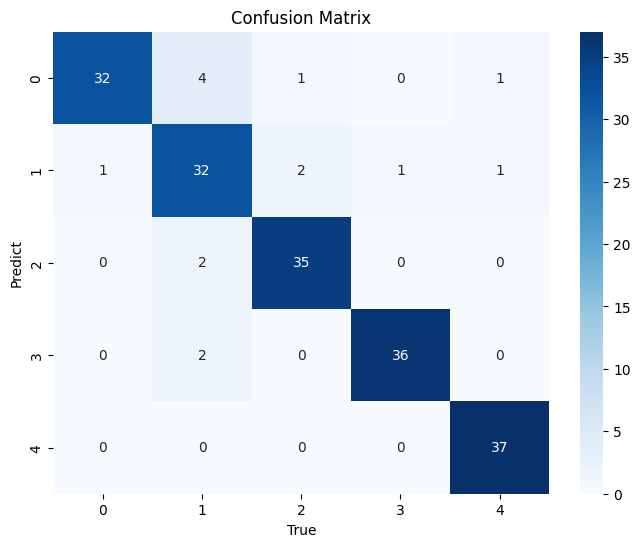

In [189]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#XGBoost

In [190]:
xgb_model = XGBClassifier()

param_grid = {
  "max_depth": [3, 5, 7],
  "learning_rate": [0.01, 0.1],
  "n_estimators": [100, 200],
  "gamma": [0, 0.1],
  "colsample_bytree": [0.7, 0.8],
}


In [191]:
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [192]:
xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [193]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.86      0.84      0.85        37
         3.0       0.88      1.00      0.94        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [194]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


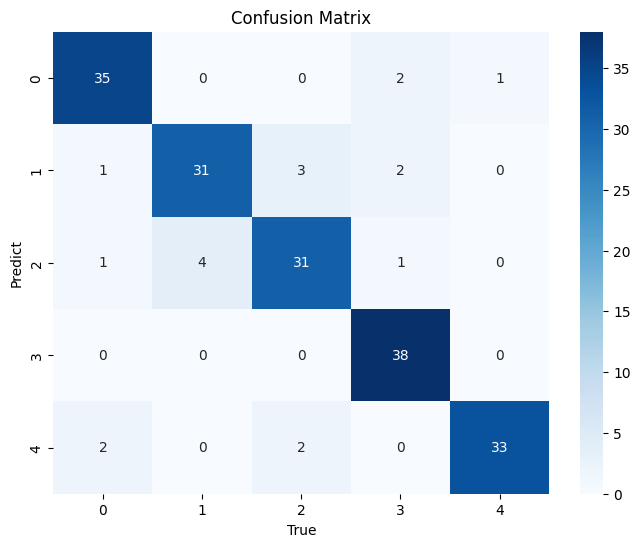

In [195]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


#8) Evaluasi
Berikutnya, kita akan mengevaluasi data dan melakukan perbandingan antara algoritma untuk menentukan jenis model yang menghasilkan tingkat akurasi terbaik.







In [196]:
import matplotlib.pyplot as plt

In [197]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_knn_smote*100,
              accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()


,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


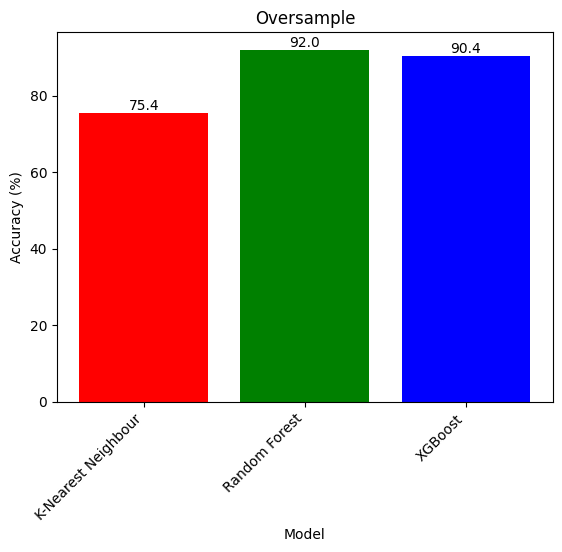

In [198]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')
 # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()



In [199]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                          'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                          accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()




,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


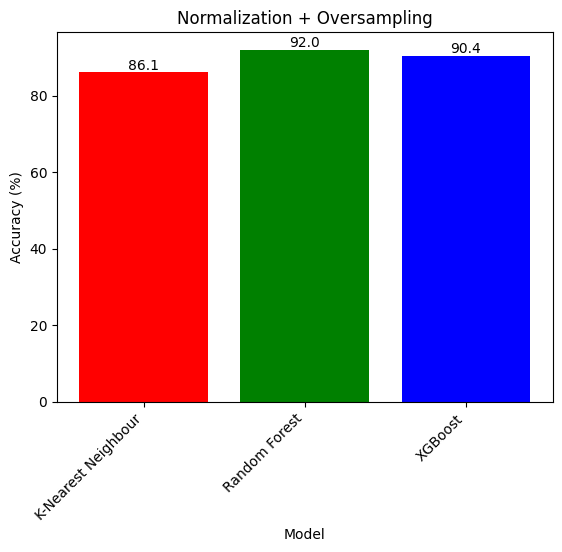

In [200]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


#9) Kesimpulan

Berdasarkan hasil penelitian, setelah menerapkan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost, serta melakukan berbagai penanganan data seperti random oversampling menggunakan SMOTE untuk mengatasi ketidakseimbangan data, RandomSearchCV untuk penyetelan, dan normalisasi data, dapat diambil kesimpulan sebagai berikut:

1. Penggunaan teknik Random Oversampling SMOTE pada model KNN menghasilkan akurasi sebesar 75.4%, sementara model Random Forest mencapai akurasi 92%, dan model XGBoots memiliki akurasi 90.4%.

2. Ketika klasifikasi dilakukan dengan menggunakan data yang telah dinormalisasi dan menerapkan Random Oversampling SMOTE pada model KNN, akurasi mencapai 86.1%. Sementara itu, model Random Forest memperoleh akurasi 92%, dan model XGBoots tetap pada akurasi 90.4%.

3. Pada klasifikasi dengan data yang telah mengalami penyetelan menggunakan RandomSearchCV, normalisasi, dan Random Oversampling SMOTE, model KNN mencapai akurasi 93%, model Random Forest mengalami penurunan signifikan pada akurasi sebesar 87.7%, dan model XGBoots mempertahankan akurasi 92%.

Dengan demikian, dapat disimpulkan bahwa penanganan optimal terhadap ketidakseimbangan data dilakukan dengan menggunakan metode Random Oversampling SMOTE, disertai penyetelan menggunakan RandomSearchCV, dan normalisasi data. Pendekatan ini memberikan hasil signifikan dalam meningkatkan akurasi model klasifikasi, terutama pada model KNN dan XGBoots. Meskipun demikian, perlu dicatat bahwa hasil ini tidak mencerminkan peningkatan pada model Random Forest, yang justru mengalami penurunan akurasi yang cukup besar. Secara keseluruhan, strategi penanganan ketidakseimbangan data melalui penyetelan parameter, normalisasi, dan oversampling dapat memiliki dampak positif yang signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan parameter optimal dapat meningkatkan akurasi dan kinerja secara keseluruhan.